In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def iterationGraph(file1, file2, maxTimestep, title):

    def iterations(file):

        df = pd.read_csv(file)
        df.columns = ['One']
        df['One'] = df['One'].astype('string')
        new = df['One'].str.split(' ', expand = True) 
        df['Time']= new[0].astype('float') 
        df['solverPerfInitRes']= new[1].astype('float') 
        df['residualvf']= new[2].astype('float') 
        df['materialResidual']= new[3].astype('float') 
        df['outerCorrector']= new[4].astype('float') 
        df.drop(columns =['One'], inplace = True) 
        
        return df['outerCorrector']
  
    plt.figure(figsize=(10,5))

    iterations1 = iterations(file1)
    iterations2 = iterations(file2)

    plt.scatter(1, iterations1, label = file1_label + "\nTotal Iterations: " + str(sum(iterations1)))#, linestyle='dashed')
    plt.scatter(1, iterations2,  label = file2_label + "\nTotal Iterations: " + str(sum(iterations2)))#, linestyle='dashed')
    f= 15
    plt.xlabel("Time-step ", fontsize = f)
    plt.ylabel("Iterations", fontsize = f)
    plt.ylim(bottom=0) 
    plt.ticklabel_format(axis="y", style="plain")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),  ncol=2, fontsize = f-3)
    plt.grid(b=True, which='major', axis = 'y', color='#999999', linestyle='-')
    plt.show()

    return iterations1, iterations2

def iterationTime(file): 

    df = pd.read_csv(file)
    df.columns = ['One']
    df['One'] = df['One'].astype('string')
    new = df['One'].str.split(' ', expand = True) 
    df['Time']= new[0].astype('float') 
    df['Iteration']= new[1].astype('float') 
    df['ExecutionTime']= new[2].astype('float') 
    df['Residual']= new[3].astype('float') 
    df.drop(columns =['One'], inplace = True) 

    return df
       

# Fine Mesh

In [6]:
file1 = "./iterationTime.dat"

filepath1 = "mesh100/plateHole"
file1_label = "Fine mesh without ML"

filepath2 = "mesh100/plateHole_ML"
file2_label = "Fine mesh trained on coarse mesh"

filepath3 = "mesh10/plateHole"
file3_label = "Mesh 10"

maxTimestep = 1

# Define iteration files

filepath1 = filepath1 + "/iterationTime.dat"
filepath2 = filepath2 + "/iterationTime.dat"
filepath3 = filepath3 + "/iterationTime.dat"

df_1 = iterationTime(filepath1)
df_2 = iterationTime(filepath2)
df_3 = iterationTime(filepath3)

/tmp/ipykernel_19951/337039110.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')


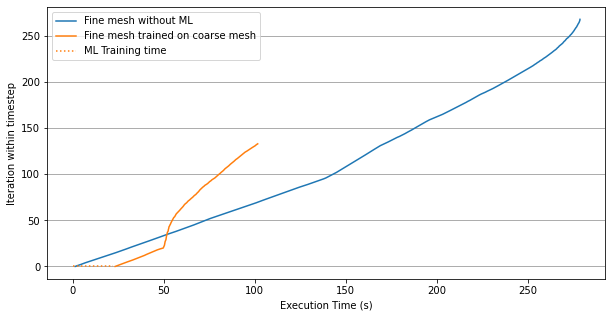

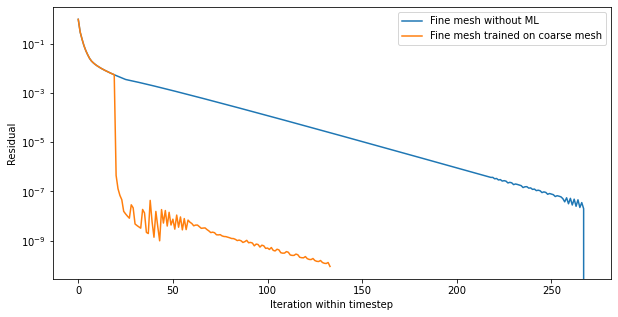

In [12]:
training_time = 22

ML_case_time = df_2["ExecutionTime"] + training_time

plt.figure(figsize=(10,5))
plt.grid(b=True, which='both', axis = 'y', color='#999999', linestyle='-')
plt.plot(df_1["ExecutionTime"], df_1["Iteration"], label = file1_label) 
plt.plot(ML_case_time, df_2["Iteration"],  label = file2_label) 
plt.plot(np.arange(0, training_time + 1), np.zeros(training_time + 1), label = "ML Training time", c = "C1", linestyle = ":")

plt.xlabel("Execution Time (s)")
plt.ylabel("Iteration within timestep")
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(df_1["Iteration"], df_1["Residual"],  label = file1_label ) 
plt.plot(df_2["Iteration"], df_2["Residual"],  label = file2_label) 
plt.xlabel("Iteration within timestep")
plt.ylabel("Residual")
plt.yscale("log")
plt.legend()

plt.show()

In [5]:
time_ML = np.array(ML_case_time)[-1]
time_total = np.array(df_1["ExecutionTime"])[-1]

print("Total speed up (%): " + str(round((time_total - time_ML)*100/time_total)) + "%")

Total speed up (%): 64%
